In [1]:
import pandas as pd
import numpy as np

In [2]:
data_root = 'feature_engineering/dataset/mag_dataset/'

In [3]:
all_data = pd.read_json(data_root+'mag_papers_0.txt',lines=True)
all_data.head()

,title,lang,year,references,abstract,url,id,fos,authors,publisher,doi,keywords,issue,venue,volume,doc_type,page_start,page_end,n_citation
0,System and Method for Maskless Direct Write Li...,en,2015,"[354c172f-d877-4e60-a7eb-c1b1cf03ce4d, 76cf106...",A system and method for maskless direct write ...,[http://www.freepatentsonline.com/y2016/021111...,0000002e-c2f2-4e25-9341-60d39130ac7a,"[Electronic engineering, Computer hardware, En...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The dilemma of the Mycobacterium avium subspec...,en,2016,NaN,NaN,[http://www.omicsonline.org/proceedings/the-di...,0000003d-5ce0-4eed-a56f-bbd3f8d8242b,"[Biology, Virology, Immunology, Microbiology]",[{'name': 'Ahmed M. Alluwaimi'}],OMICS International,10.4172/2157-7560.C1.030,"[paratuberculosis, of, subspecies, proceedings...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Should endometriosis be an indication for intr...,en,2015,NaN,NaN,[http://www.fertstert.org/article/S0015-0282(1...,00000061-0bab-468b-9481-de0c899783f3,NaN,"[{'name': 'Jovana P. Lekovich', 'org': 'Weill ...",Elsevier,10.1016/j.fertnstert.2015.07.492,NaN,3.0,Fertility and Sterility,104.0,Journal,NaN,NaN,NaN
3,Radio: Radio San Sebastián,es,1950,NaN,NaN,[http://dialnet.unirioja.es/servlet/articulo?c...,00000081-4562-4882-a29d-5b9cb510ffc3,[Performance art],[{'name': 'P. M. Voltes'}],Editorial Lira,NaN,"[musica, arte]",228.0,NaN,20.0,NaN,6,NaN,NaN
4,異時性6 重複癌の1 例,ja,2011,NaN,早期発見と治療成績の向上で担癌患者の生存期間が延びており，それに伴い重複癌を経験する機会も増...,[http://www.pieronline.jp/content/article/0385...,00000099-1ee9-4741-908c-02a7bf4857e8,NaN,"[{'name': '高田和外'}, {'name': 'ほか'}]",癌と化学療法社,NaN,NaN,4.0,NaN,38.0,NaN,697,700,NaN


In [4]:
all_data.shape

(1000000, 19)

In [11]:
# 对title进行去重
model_df = all_data.drop_duplicates(subset='title',keep='first')
model_df.shape

(999700, 19)

In [12]:
model_df = model_df[:20000]
model_df.shape

(20000, 19)

In [13]:
# 筛选出英文文本 删除无用列
model_df = model_df[model_df['lang'] == 'en'].drop(
    ['doc_type', 'doi', 'id', 'issue', 'lang',
    'n_citation', 'page_end', 'page_start',
    'publisher', 'references','url', 'venue', 'volume'],axis = 1
)

In [14]:
model_df.shape

(10399, 6)

In [15]:
# fos为分类
model_df['fos'].head()

0    [Electronic engineering, Computer hardware, En...
1        [Biology, Virology, Immunology, Microbiology]
2                                                  NaN
5                                                  NaN
7           [Medicine, Pathology, Gynecology, Surgery]
Name: fos, dtype: object

In [19]:
type(model_df['fos'].iloc[3])

float

In [20]:
the_nan = model_df['fos'].iloc[3]
the_nan

nan

In [25]:
np.isnan(model_df['fos'].iloc[3])

True

In [28]:
pd.isna(model_df['fos'])

0        False
1        False
2         True
5         True
7        False
         ...  
19994    False
19995    False
19997    False
19998    False
19999    False
Name: fos, Length: 10399, dtype: bool

In [29]:
# 有1700多个分类是NaN
len(model_df[pd.isna(model_df['fos'])])

1733

In [30]:
model_df['year'].describe()

count    10399.000000
mean      1997.324839
std         21.128662
min       1831.000000
25%       1990.000000
50%       2005.000000
75%       2012.000000
max       2017.000000
Name: year, dtype: float64

In [31]:
# 对于fos里空值取0
# 先将nan用0替代 然后对于每行进行循环 然后对每行中每个值进行循环 放进set中 最后转成list

unique_fos = sorted(list(
    {feature
     for paper_row in model_df['fos'].fillna('0')
     for feature in paper_row}
))

In [32]:
unique_fos

['0',
 '0-10 V lighting control',
 '1/N expansion',
 '10G-PON',
 '14-3-3 protein',
 '2-choice hashing',
 '20th-century philosophy',
 '2D computer graphics',
 '2DEG',
 '3-D Secure',
 '3D computer graphics',
 '3D radar',
 '3D reconstruction',
 '3D single-object recognition',
 '3G',
 '3G MIMO',
 '40-bit encryption',
 '5-HT1 receptor',
 '5-HT2 receptor',
 '5-HT5A receptor',
 '5052 aluminium alloy',
 '56-bit encryption',
 '6111 aluminium alloy',
 '78xx',
 'ABO blood group system',
 'AC motor',
 'AI-complete',
 'AIM2',
 'AM/FM/GIS',
 'AMPA receptor',
 'ANK1',
 'ASK1',
 'ATP-binding cassette transporter',
 'ATPase',
 'AXL receptor tyrosine kinase',
 'Ab initio quantum chemistry methods',
 'Abductive logic programming',
 'Abell 2744',
 'Abiogenesis',
 'Abiotic stress',
 'Absolute deviation',
 'Absolute return',
 'Absorbed dose',
 'Absorption',
 'Absorption spectroscopy',
 'Abstract family of languages',
 'Acceleration',
 'Accelerator mass spectrometry',
 'Access control',
 'Access method',
 'A

In [38]:
len(unique_fos)

7604

In [33]:
# 年份不重复表
unique_year = sorted(model_df['year'].astype('str').unique())

In [51]:
def feature_array(x,unique_array):
    row_dict = {}
    # 整个的字典
    for i in x.index:
        var_dict = {}
        # 对于每一个行 即 每一个论文 有一个one-hot字典
        for j in range(len(unique_array)):
            if type(x[i]) is list:
            # 如果x[i]是列表 有很多种类 那么出现过的就是1 否则是0
                if unique_array[j] in x[i]:
                    var_dict[unique_array[j]] = 1
                else:
                    var_dict[unique_array[j]] = 0
            else:
            # 如果x[i]是单个值 年份的情况下 那么相等就是1 否则就是0
                if unique_array[j] == str(x[i]):
                    var_dict[unique_array[j]] = 1
                else:
                    var_dict[unique_array[j]] = 0
        row_dict[i] = var_dict
        # 构成矩阵
    feature_df = pd.DataFrame.from_dict(row_dict,dtype='int').T
    # 构成DataFrame
    return feature_df

In [52]:
# 构成fos特征one-hot和year特征one-hot

fos_feature = feature_array(model_df['fos'],unique_fos)

In [53]:
fos_feature.shape
# fos_feature的One-hot矩阵 10399个样本对应一万多个论文 7604个fos分类 有就是1 否则是0

(10399, 7604)

In [54]:
year_feature = feature_array(model_df['year'],unique_year)

In [55]:
year_feature.shape
# year_feature-hot矩阵 10399个样本对应一万多个论文 156个不同年份 是就是1 否则是0

(10399, 156)

In [56]:
# 第一轮特征工程的处理结果 fos特征与Year特征拼接
first_feature = fos_feature.join(year_feature).T

In [57]:
first_feature.head()

,0,1,2,5,7,8,9,10,11,12,...,19985,19986,19987,19988,19993,19994,19995,19997,19998,19999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0-10 V lighting control,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/N expansion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10G-PON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14-3-3 protein,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
first_feature.shape

# 每一行是对应特征 总共有7604+156维特征 每一列是一个论文样本10399个样本

(7760, 10399)

In [59]:
from sys import getsizeof

print('Size of first feature array: ', getsizeof(first_feature))

Size of first feature array:  646144562


In [61]:
# 协同过滤 查找相似值

from scipy.spatial.distance import cosine

def item_collab_filter(feature_df):
    item_similarities = pd.DataFrame(index=feature_df.columns, columns = feature_df.columns)

    for i in feature_df.columns:
        for j in feature_df.columns:
            item_similarities.loc[i][j] = 1-cosine(feature_df[i],feature_df[j])
            # 列和列之间做cos 因为列代表的是每个样本
    return item_similarities

In [62]:
first_item = item_collab_filter(first_feature.loc[:,0:1000])
# 此次计算时间极长 O(n2)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

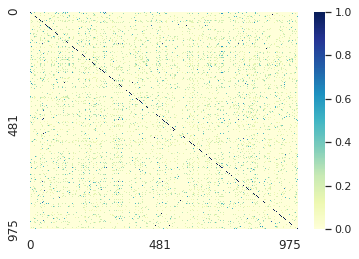

In [64]:
sns.set()
ax = sns.heatmap(first_item.fillna(0),
                 vmin=0, vmax=1,
                 cmap='YlGnBu',
                 xticklabels=250,yticklabels=250)
ax.tick_params(labelsize=12)

# 颜色越深彼此相似度越高 而对角线就是自己和自己计算相似度 所以是最黑的
# 有一些空的位置 因为有一些NaN值 导致的空白

In [65]:
# 基于item_df的topn进行推荐
def paper_recommender(paper_ix, item_df):
    print('Based on the paper: \n index = ', paper_ix)
    print(model_df.iloc[paper_ix])

    top_results = item_df.loc[paper_ix].sort_values(ascending=False).head(4)

    print('\n Top three results: ')
    order = 1
    for i in top_results.index.tolist()[-3:]:
        print(order,'. Paper index = ', i)
        print('Similarity Score: ',top_results[i])
        print(model_df.iloc[i],'\n')
        if order<5:
            order += 1

In [66]:
paper_recommender(2, first_item)

Based on the paper: 
 index =  2
title       Should endometriosis be an indication for intr...
year                                                     2015
abstract                                                  NaN
fos                                                       NaN
authors     [{'name': 'Jovana P. Lekovich', 'org': 'Weill ...
keywords                                                  NaN
Name: 2, dtype: object

 Top three results: 
1 . Paper index =  525
Similarity Score:  1.0
title       Super-Hydrophilic Lu3+-Doped TiO2 Photocatalys...
year                                                     2012
abstract    The self-cleaning glasses can be realized by c...
fos            [Materials Science, Ceramic materials, Optics]
authors     [{'name': 'Wen Yuan Xu'}, {'name': 'Li Na Meng...
keywords    [lu 3 doping, super hydrophilicity, tio 2 film...
Name: 1021, dtype: object 

2 . Paper index =  593
Similarity Score:  1.0
title       The water saving potential and the socio-econo

In [ ]:
# 第一种方法整体而言是采用两列特征 用极为稀疏的近似one-hot矩阵 用cos计算相似度进行推荐

# 总体而言 第一个方法太慢了 找出的结果也不是很理想
# 需要更智能 迭代化的特征工程方法

In [ ]:
# ---------------------------------------------------------------------------------------

In [68]:
# 对出版年份进行分析 取值范围与分位数
print('Year spread: ', model_df['year'].min()," - ",model_df['year'].max())
print('Quantile spread: \n', model_df['year'].quantile([0.25,0.5,0.75]))

Year spread:  1831  -  2017
Quantile spread: 
 0.25    1990.0
0.50    2005.0
0.75    2012.0
Name: year, dtype: float64


Text(0, 0.5, 'Occurrence')

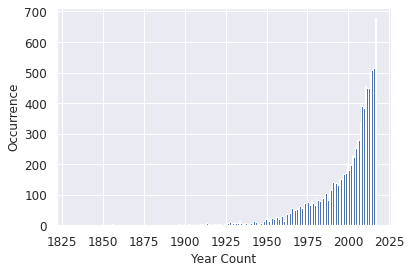

In [69]:
fig, ax = plt.subplots()
model_df['year'].hist(ax=ax, bins= model_df['year'].max() - model_df['year'].min())
ax.tick_params(labelsize=12)
ax.set_xlabel('Year Count', fontsize=12)
ax.set_ylabel('Occurrence', fontsize=12)

# 长尾分布 很适合分箱操作

In [70]:
bins = int(round((model_df['year'].max() - model_df['year'].min()) / 10))
bins

19

In [71]:
temp_df = pd.DataFrame(index = model_df.index)
temp_df['yearBinned'] = pd.cut(model_df['year'].tolist(), bins)
X_yrs = pd.get_dummies(temp_df['yearBinned'])
X_yrs.columns.categories

# 分十九箱

IntervalIndex([(1830.814, 1840.789], (1840.789, 1850.579], (1850.579, 1860.368], (1860.368, 1870.158], (1870.158, 1879.947] ... (1968.053, 1977.842], (1977.842, 1987.632], (1987.632, 1997.421], (1997.421, 2007.211], (2007.211, 2017.0]], dtype='interval[float64, right]')

In [72]:
temp_df
# temp_df是用cut对每类进行分箱

,yearBinned
0,"(2007.211, 2017.0]"
1,"(2007.211, 2017.0]"
2,"(2007.211, 2017.0]"
5,"(1958.263, 1968.053]"
7,"(1968.053, 1977.842]"
...,...
19994,"(1948.474, 1958.263]"
19995,"(2007.211, 2017.0]"
19997,"(1968.053, 1977.842]"
19998,"(1977.842, 1987.632]"


In [73]:
X_yrs
# get_dummies是对齐进行转换成one-hot向量

,"(1830.814, 1840.789]","(1840.789, 1850.579]","(1850.579, 1860.368]","(1860.368, 1870.158]","(1870.158, 1879.947]","(1879.947, 1889.737]","(1889.737, 1899.526]","(1899.526, 1909.316]","(1909.316, 1919.105]","(1919.105, 1928.895]","(1928.895, 1938.684]","(1938.684, 1948.474]","(1948.474, 1958.263]","(1958.263, 1968.053]","(1968.053, 1977.842]","(1977.842, 1987.632]","(1987.632, 1997.421]","(1997.421, 2007.211]","(2007.211, 2017.0]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [78]:
temp_df['yearBinned'].value_counts()

(2007.211, 2017.0]      4329
(1997.421, 2007.211]    2352
(1987.632, 1997.421]    1378
(1977.842, 1987.632]     835
(1968.053, 1977.842]     593
(1958.263, 1968.053]     374
(1948.474, 1958.263]     227
(1938.684, 1948.474]      80
(1928.895, 1938.684]      75
(1919.105, 1928.895]      49
(1909.316, 1919.105]      30
(1899.526, 1909.316]      21
(1889.737, 1899.526]      14
(1879.947, 1889.737]      10
(1870.158, 1879.947]       8
(1830.814, 1840.789]       8
(1840.789, 1850.579]       7
(1860.368, 1870.158]       5
(1850.579, 1860.368]       4
Name: yearBinned, dtype: int64

In [77]:
X_yrs.sum()
# 统计各个分箱出现次数

(1830.814, 1840.789]       8
(1840.789, 1850.579]       7
(1850.579, 1860.368]       4
(1860.368, 1870.158]       5
(1870.158, 1879.947]       8
(1879.947, 1889.737]      10
(1889.737, 1899.526]      14
(1899.526, 1909.316]      21
(1909.316, 1919.105]      30
(1919.105, 1928.895]      49
(1928.895, 1938.684]      75
(1938.684, 1948.474]      80
(1948.474, 1958.263]     227
(1958.263, 1968.053]     374
(1968.053, 1977.842]     593
(1977.842, 1987.632]     835
(1987.632, 1997.421]    1378
(1997.421, 2007.211]    2352
(2007.211, 2017.0]      4329
dtype: int64

Text(0, 0.5, 'Count')

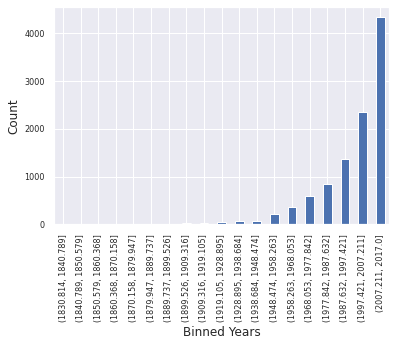

In [74]:
fig,ax = plt.subplots()
X_yrs.sum().plot.bar(ax=ax)
ax.tick_params(labelsize=8)
ax.set_xlabel('Binned Years', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# 分箱后特征

In [ ]:
# 处理fos特征

In [79]:
X_fos = fos_feature.values

print('Pandas Series Size: ', getsizeof(fos_feature))
print('Numpy Array Size: ', getsizeof(X_fos))

Pandas Series Size:  632939408
Numpy Array Size:  120


In [81]:
X_fos.shape

(10399, 7604)

In [82]:
X_yrs.shape

(10399, 19)

In [80]:
# 第二轮特征工程得到的特征结果
second_feature = np.append(X_fos, X_yrs, axis=1)
second_feature.shape

# X_fos 7604分类 这次year是19个分类 因为分箱了 所以总共是7604+19 = 7623分类

(10399, 7623)

In [83]:
# 继续用余弦相似度进行度量

from sklearn.metrics.pairwise import cosine_similarity

In [84]:
def piped_collab_filter(feature_matrix, index, top_n):
    item_similarities = 1-\
                        cosine_similarity(feature_matrix[index:index+1], feature_matrix).flatten()
    # 相似度就是index坐标位置的向量 和其他所有做余弦计算

    related_indices = [i for i in item_similarities.argsort()[::-1] if i != index]
    # 先排序 然后取不等于index的下标
    return [(index, item_similarities[index])
            for index in related_indices][0:top_n]
    # 组成top_n个推荐值


In [95]:
model_df.index.get_loc(2)

2

In [103]:
model_df.columns.get_loc('year')

1

In [99]:
def paper_recommender(item_df, paper_ix, top_n):
    if paper_ix in model_df.index:
        print('Based on the paper: ')
        # print('Paper Index = ',model_df.loc[paper_ix]['name'])
        print('Paper Title = ', model_df.loc[paper_ix]['title'])

        array_ix = model_df.index.get_loc(paper_ix)
        top_results = piped_collab_filter(item_df, array_ix, top_n)
        print('\n Top ', top_n, ' results:')

        order = 1
        for i in range(len(top_results)):
        # for i in top_results.index.tolist()[-3:]:
            print(order,'. Paper index = ', i)
            print('Similarity Score: ',top_results[i])
            print(model_df.iloc[i],'\n')
            if order<5:
                order += 1

In [100]:
paper_recommender(second_feature,2,3)

Based on the paper: 
Paper Title =  Should endometriosis be an indication for intracytoplasmic sperm injection (ICSI) in fresh IVF cycles

 Top  3  results:
1 . Paper index =  0
Similarity Score:  (5199, 1.0)
title       System and Method for Maskless Direct Write Li...
year                                                     2015
abstract    A system and method for maskless direct write ...
fos         [Electronic engineering, Computer hardware, En...
authors                                                   NaN
keywords                                                  NaN
Name: 0, dtype: object 

2 . Paper index =  1
Similarity Score:  (6088, 1.0)
title       The dilemma of the Mycobacterium avium subspec...
year                                                     2016
abstract                                                  NaN
fos             [Biology, Virology, Immunology, Microbiology]
authors                      [{'name': 'Ahmed M. Alluwaimi'}]
keywords    [paratuberculosis, o

In [ ]:
# 目前改进一次之后 虽然可能有所提升 但是也没有多好 此时该怎么办
# 1. 使用原始数据中的更多数据 看看能否得到更好的结果
# 2. 花费更多时间 探索数据 看能否找到一个足够密集的结合来提供更好的推荐
# 3. 添加更多特征 继续迭代当前模型

# 第一种是有可能的 但是过于类似于大海捞针了
# 第二种可以更好地理解原始数据 应该在数据探索过程中 不断进行调整
# 第三种添加更多的特征 得到更好的效果十分合理

In [ ]:
# ---------------------------------------------------------------------------------------

In [ ]:
# 第三轮 考虑论文摘要和作者姓名

In [104]:
filled_df = model_df.fillna('None')

from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
# 对abstract处理

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X_abstract = vectorizer.fit_transform(filled_df['abstract'])
third_features = np.append(second_feature, X_abstract.toarray(), axis=1)

# 使用tf-idf将英文单词转化提出特征 再加入成为新特征

In [106]:
X_abstract.shape
# tfidf将英文词汇转化为48516维的向量

(10399, 48516)

In [109]:
authors_df = pd.DataFrame(filled_df.authors)

In [110]:
authors_df.itertuples()

In [111]:
# 对author处理

authors_list = []
for row in authors_df.itertuples():
    y = {}
    if type(row.authors) is str:
        y = {'None': row.Index}
    if type(row.authors) is list:
        y = dict.fromkeys(row.authors[0].values(), row.Index)
    authors_list.append(y)

# 先把作者整理成字典 再进行one-hot编码

In [112]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = authors_list
X_authors = v.fit_transform(D)
fourth_feature = np.append(third_features, X_authors, axis=1)

# 使用DictVectorizer转换 最终所有结果作为第四特征

In [113]:
fourth_feature.shape
# 最终维度70167维特征

(10399, 70167)

In [114]:
paper_recommender(fourth_feature, 2, 3)

Based on the paper: 
Paper Title =  Should endometriosis be an indication for intracytoplasmic sperm injection (ICSI) in fresh IVF cycles

 Top  3  results:
1 . Paper index =  0
Similarity Score:  (5199, 1.0)
title       System and Method for Maskless Direct Write Li...
year                                                     2015
abstract    A system and method for maskless direct write ...
fos         [Electronic engineering, Computer hardware, En...
authors                                                   NaN
keywords                                                  NaN
Name: 0, dtype: object 

2 . Paper index =  1
Similarity Score:  (2878, 1.0)
title       The dilemma of the Mycobacterium avium subspec...
year                                                     2016
abstract                                                  NaN
fos             [Biology, Virology, Immunology, Microbiology]
authors                      [{'name': 'Ahmed M. Alluwaimi'}]
keywords    [paratuberculosis, o